In [1]:
#Working on applying Prophet to our datasets

#Importing the necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from prophet import Prophet
import pickle
import matplotlib.ticker as ticker






In [2]:
#Read in the data
df_utahpop = pd.read_csv('../Resources/utah population 2000-2022 neilsberg.csv')
mhpu_df = pd.read_csv('../Usefull Dataframes/Median_Home_Prices_Monthly_In_Thousands.csv')
df_ushpi = pd.read_csv('../Resources/Utah State House Price Index.csv')
with open('../Pop vs Build Permits/Resources/permits_df.pkl', 'rb') as f:
    permits_df = pickle.load(f)



display(mhpu_df.head())
display(df_ushpi.head())

#Analyze the data
display(df_utahpop.info())
display(df_utahpop.describe())
df_utahpop

display(permits_df.head())




,Date,Home Prices
0,2000-01-01,164.74
1,2000-02-01,164.83
2,2000-03-01,164.97
3,2000-04-01,165.33
4,2000-05-01,166.62


,DATE,UTSTHPI
0,1975-01-01,55.14
1,1975-04-01,58.70
2,1975-07-01,55.16
3,1975-10-01,59.90
4,1976-01-01,61.79


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0                        24 non-null     object
 1   Population           23 non-null     object
 2   Year on Year Change  23 non-null     object
 3   Change in Percent    23 non-null     object
dtypes: object(4)
memory usage: 900.0+ bytes


None

,,Population,Year on Year Change,Change in Percent
count,24,23,23,23
unique,24,23,23,21
top,2000,"2,244,207",-,1.68%
freq,1,1,1,2


,DATE,UTBP1FH,Month on Month Change,Percent Change,Total Permits
144,2000-01-01,944.0,NaN,NaN,944.0
145,2000-02-01,1082.0,138.0,0.146186,2026.0
146,2000-03-01,1312.0,230.0,0.212569,3338.0
147,2000-04-01,1343.0,31.0,0.023628,4681.0
148,2000-05-01,1363.0,20.0,0.014892,6044.0


In [3]:
#Transform/clean the data, if necessary

df_utahpop.rename(columns={' ':'Year'},inplace=True)
df_utahpop

df_utahpop.dropna(inplace=True)

df_utahpop.drop(df_utahpop.index[0], inplace=True)

#change column types to appropriate dtypes 

df_utahpop['Year'] = pd.to_datetime(df_utahpop['Year'], format='%Y')

columns_to_convert = ['Population', 'Year on Year Change']
for column in columns_to_convert:
    df_utahpop[column] = df_utahpop[column].str.replace(',', '').astype(int)

#set the index to the year column
df_utahpop.set_index('Year', inplace=True)

df_utahpop







,Population,Year on Year Change,Change in Percent
Year,,,
2001-01-01,2282415,38208,1.70%
2002-01-01,2322002,39587,1.73%
2003-01-01,2355755,33753,1.45%
2004-01-01,2395448,39693,1.68%
2005-01-01,2449105,53657,2.24%
2006-01-01,2513861,64756,2.64%
2007-01-01,2583023,69162,2.75%
2008-01-01,2644846,61823,2.39%
2009-01-01,2701062,56216,2.13%


array([<Axes: xlabel='Year'>, <Axes: xlabel='Year'>], dtype=object)

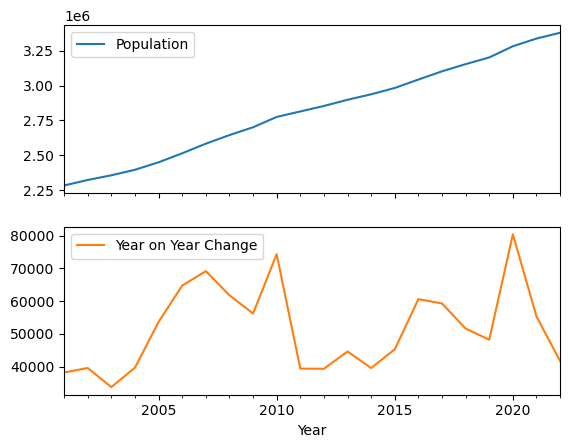

In [4]:
#Plot Dataframes
df_utahpop.plot(subplots=True)

In [5]:
#Prepare the data for Prophet
m = Prophet()
m
#Remove last two columns
df_utahpop = df_utahpop.iloc[:, :-2]
display(df_utahpop)

df_utahpop.reset_index(inplace=True)
prepped_utahpop_df = df_utahpop.rename(columns={'Year': 'ds', 'Population':'y'})


#Train the model
m.fit(prepped_utahpop_df)



,Population
Year,
2001-01-01,2282415
2002-01-01,2322002
2003-01-01,2355755
2004-01-01,2395448
2005-01-01,2449105
2006-01-01,2513861
2007-01-01,2583023
2008-01-01,2644846
2009-01-01,2701062


18:08:51 - cmdstanpy - INFO - Chain [1] start processing
18:08:51 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
#Make predictions

future_utahpop = m.make_future_dataframe(periods=5, freq="YS")
future_utahpop.tail(7)


,ds
20,2021-01-01
21,2022-01-01
22,2023-01-01
23,2024-01-01
24,2025-01-01
25,2026-01-01
26,2027-01-01


In [7]:
#Make the predictions
future_utahpop = m.predict(future_utahpop)
future_utahpop.tail(7)





,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
20,2021-01-01,1.336965e+06,3.326272e+06,3.336892e+06,1.336965e+06,1.336965e+06,1.994882e+06,1.994882e+06,1.994882e+06,1.994882e+06,1.994882e+06,1.994882e+06,0.0,0.0,0.0,3.331848e+06
21,2022-01-01,1.394646e+06,3.380816e+06,3.392385e+06,1.394646e+06,1.394646e+06,1.992060e+06,1.992060e+06,1.992060e+06,1.992060e+06,1.992060e+06,1.992060e+06,0.0,0.0,0.0,3.386706e+06
22,2023-01-01,1.452326e+06,3.438626e+06,3.451406e+06,1.449562e+06,1.455103e+06,1.992596e+06,1.992596e+06,1.992596e+06,1.992596e+06,1.992596e+06,1.992596e+06,0.0,0.0,0.0,3.444922e+06
23,2024-01-01,1.510006e+06,3.495535e+06,3.518465e+06,1.501150e+06,1.519015e+06,1.996598e+06,1.996598e+06,1.996598e+06,1.996598e+06,1.996598e+06,1.996598e+06,0.0,0.0,0.0,3.506605e+06
24,2025-01-01,1.567845e+06,3.545373e+06,3.581794e+06,1.551392e+06,1.585567e+06,1.994882e+06,1.994882e+06,1.994882e+06,1.994882e+06,1.994882e+06,1.994882e+06,0.0,0.0,0.0,3.562727e+06
25,2026-01-01,1.625525e+06,3.591898e+06,3.645437e+06,1.599721e+06,1.654439e+06,1.992060e+06,1.992060e+06,1.992060e+06,1.992060e+06,1.992060e+06,1.992060e+06,0.0,0.0,0.0,3.617585e+06
26,2027-01-01,1.683205e+06,3.637229e+06,3.717234e+06,1.646526e+06,1.722221e+06,1.992596e+06,1.992596e+06,1.992596e+06,1.992596e+06,1.992596e+06,1.992596e+06,0.0,0.0,0.0,3.675802e+06


/Users/karliebaxter/anaconda3/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/karliebaxter/anaconda3/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


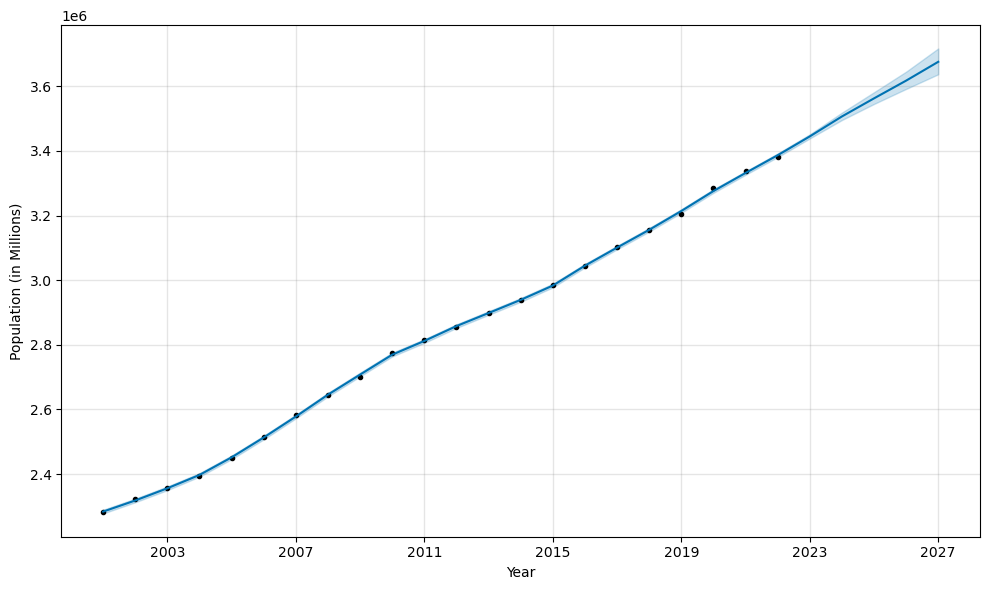

In [8]:
#Plot the predictions
fig1 = m.plot(future_utahpop, xlabel='Year', ylabel='Population (in Millions)')

/Users/karliebaxter/anaconda3/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/karliebaxter/anaconda3/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/karliebaxter/anaconda3/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of 

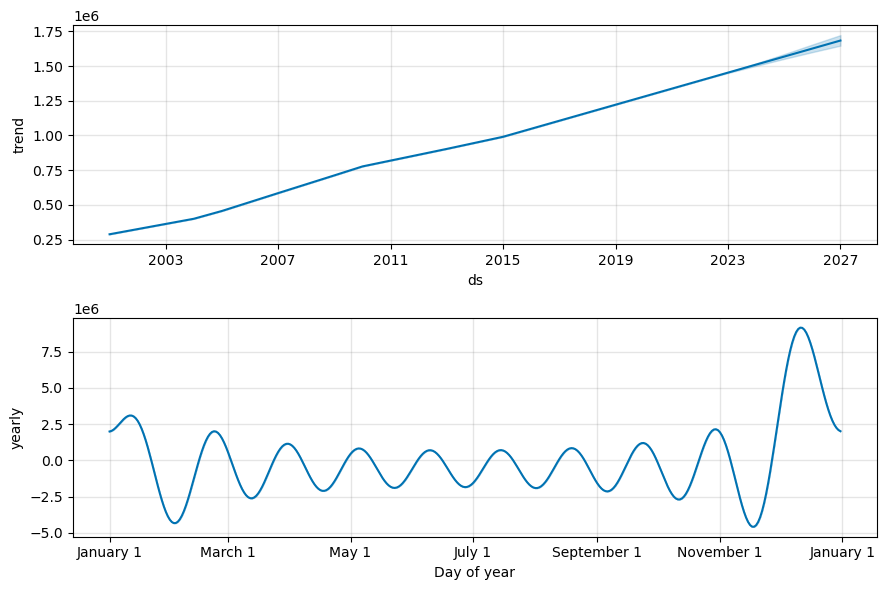

In [9]:
#Evaluate the model

fig2 = m.plot_components(future_utahpop)




In [10]:
future_utahpop

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-01,2.890699e+05,2.278129e+06,2.289672e+06,2.890699e+05,2.890699e+05,1.994882e+06,1.994882e+06,1.994882e+06,1.994882e+06,1.994882e+06,1.994882e+06,0.0,0.0,0.0,2.283952e+06
1,2002-01-01,3.262721e+05,2.312816e+06,2.324217e+06,3.262721e+05,3.262721e+05,1.992060e+06,1.992060e+06,1.992060e+06,1.992060e+06,1.992060e+06,1.992060e+06,0.0,0.0,0.0,2.318332e+06
2,2003-01-01,3.634742e+05,2.350286e+06,2.361834e+06,3.634742e+05,3.634742e+05,1.992596e+06,1.992596e+06,1.992596e+06,1.992596e+06,1.992596e+06,1.992596e+06,0.0,0.0,0.0,2.356070e+06
3,2004-01-01,4.006763e+05,2.391971e+06,2.402995e+06,4.006763e+05,4.006763e+05,1.996598e+06,1.996598e+06,1.996598e+06,1.996598e+06,1.996598e+06,1.996598e+06,0.0,0.0,0.0,2.397275e+06
4,2005-01-01,4.569700e+05,2.446193e+06,2.457610e+06,4.569700e+05,4.569700e+05,1.994882e+06,1.994882e+06,1.994882e+06,1.994882e+06,1.994882e+06,1.994882e+06,0.0,0.0,0.0,2.451852e+06
5,2006-01-01,5.211935e+05,2.507418e+06,2.518859e+06,5.211935e+05,5.211935e+05,1.992060e+06,1.992060e+06,1.992060e+06,1.992060e+06,1.992060e+06,1.992060e+06,0.0,0.0,0.0,2.513253e+06
6,2007-01-01,5.854170e+05,2.572461e+06,2.583862e+06,5.854170e+05,5.854170e+05,1.992596e+06,1.992596e+06,1.992596e+06,1.992596e+06,1.992596e+06,1.992596e+06,0.0,0.0,0.0,2.578013e+06
7,2008-01-01,6.491388e+05,2.640034e+06,2.651450e+06,6.491388e+05,6.491388e+05,1.996598e+06,1.996598e+06,1.996598e+06,1.996598e+06,1.996598e+06,1.996598e+06,0.0,0.0,0.0,2.645737e+06
8,2009-01-01,7.130353e+05,2.702339e+06,2.714081e+06,7.130353e+05,7.130353e+05,1.994882e+06,1.994882e+06,1.994882e+06,1.994882e+06,1.994882e+06,1.994882e+06,0.0,0.0,0.0,2.707918e+06
9,2010-01-01,7.774712e+05,2.764042e+06,2.775624e+06,7.774712e+05,7.774712e+05,1.992060e+06,1.992060e+06,1.992060e+06,1.992060e+06,1.992060e+06,1.992060e+06,0.0,0.0,0.0,2.769531e+06
